In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
X = iris["data"]

LINEAR REGRESSION

In [2]:
#These 2 columns are fairly well correlated
df=pd.DataFrame(X)
df=df[[2,3]]
print(df.corr())

          2         3
2  1.000000  0.962865
3  0.962865  1.000000


In [3]:
#For comparison
x=np.array(df[2]).reshape(-1,1)
y_lin=np.array(df[3]).reshape(-1,1)
classifier = LinearRegression()
classifier.fit(x, y_lin)
classifier.coef_, classifier.intercept_

(array([[0.41575542]]), array([-0.36307552]))

In [4]:
m=1
b=1
lr=.01
errors = []
def get_grad(x, y, m, b):
    y_hat = (m*x)+b
    error = (y-y_hat)
    errors.append(error)
    dm = error*x*lr
    db = error*lr
    m = m+dm
    b = b+db
    return m, b

In [5]:
epochs = 500
for e in range(epochs):
    for i in range(len(df)):
        m, b = get_grad(df[2][i], df[3][i], m, b)

0.46927644771215543 -0.3970419741231056


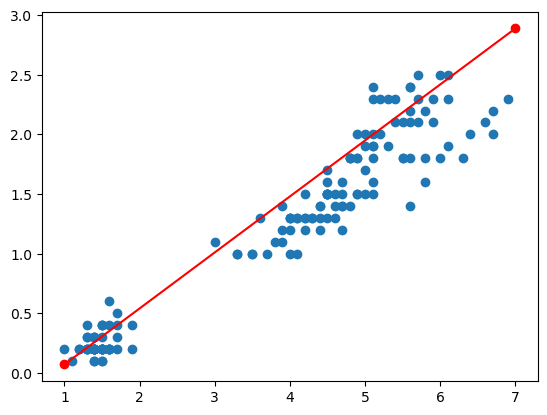

In [6]:
x1, y1 = [1, 7], [((m*1)+b), (m*7+b)]
plt.plot(x1, y1, marker = 'o', color ='r')
plt.scatter(df[2], df[3]);
print(m,b)

In [7]:
#Setting data up for logistic regression
y = (iris["target"] == 0).astype(int) 
X_logistic=X[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size = 0.2, random_state = 0)

In [8]:
#For comparison
classifier = LogisticRegression(random_state = 0, penalty = None)
classifier.fit(X_train, y_train)
classifier.coef_, classifier.intercept_
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 2,  9]])

In [9]:
m=1
b=1
lr=.1
errors = []
def get_grad_log(x, y, m, b):
    z = (m*x)+b
    y_hat = 1/ (1 + np.exp(-z))#forward pass
    error = y_hat-y #get error
    dm = x*error
    db = error
    m -= dm*lr
    b -= db*lr
    return m, b

In [10]:
epochs=1500
for e in range(epochs):
    for i in range(len(X_train[:])):
        m,b = get_grad_log(X_train[i], y_train[i], m, b)

In [11]:
preds = []
for test_x in X_test:
    z = (m*test_x)+b
    preds.append(1/ (1 + np.exp(-z)))

In [12]:
preds=[1 if p > .5 else 0 for p in preds]
confusion_matrix(np.asarray(y_test), np.asarray(preds))

array([[18,  1],
       [ 1, 10]])

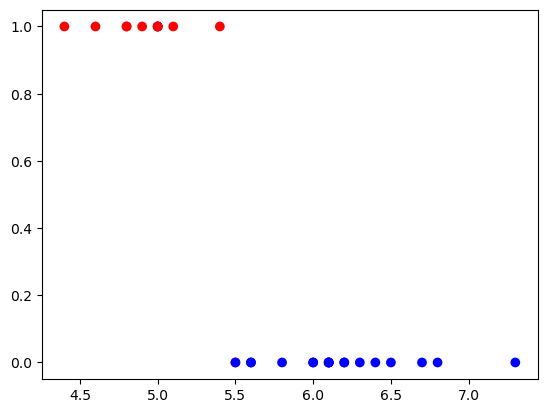

In [13]:
plt.scatter(X_test, preds, color=['r' if c == 1 else 'b' for c in y_test])
plt.show()